Import Data

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)
    


In [259]:
df_2014_2019 = pd.read_csv(r"C:\Users\AlexanderSchlechter\Google Drive\Bachelorarbeit\16.01.2020\BachelorThesisASch\AdditionalData\df_2014-2019", 
                           index_col=0)


In [260]:
df = pd.concat([df_2014_2019, df_raw])

Additional Settings

In [261]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import ticker
import matplotlib.patches as mpatches

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

#setting matplotlib style
plt.style.use('default')

#setting params for matplolib plots
plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title
#plt.rcParams['legend.fontsize'] = 22

#setting grid style
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

In [262]:
df_2014_2019.columns

Index(['year', 'quarter', 'timestamp', 'rssdid', 'name', 'Financial Institution Filing Type', 'assets', 'cash', 'equity', 'loans', 'loansnet', 'fedfundsrepoasset', 'tradingassets', 'securities', 'liabilities', 'deposits', 'fedfundsrepoliab', 'tradingliabilities', 'otherborrowedmoney', 'subordinateddebt'], dtype='object')

In [263]:
#getting relevant data
df_assets = df_raw[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

df_assets_2014 = df_2014_2019[["rssdid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "Financial Institution Filing Type"]]

df_assets2 = df[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

Try finding banks which are in one dataset but not in the other

In [264]:
df_assets_2014["Financial Institution Filing Type"].value_counts()

41.0    97455
51.0    43959
31.0     1853
Name: Financial Institution Filing Type, dtype: int64

In [265]:
df_assets_2014[df_assets_2014["Financial Institution Filing Type"]==51]

,rssdid,name,year,quarter,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,Financial Institution Filing Type
76549,37.0,BANK OF HANCOCK COUNTY,2017,1,85808.0,9189.0,0.0,NaN,25575.0,0.0,51.0
76550,242.0,FIRST COMMUNITY BANK XENIA-FLORA,2017,1,41508.0,2966.0,1715.0,NaN,25554.0,0.0,51.0
76552,354.0,BISON STATE BANK,2017,1,8414.0,742.0,171.0,NaN,3333.0,0.0,51.0
76553,457.0,LOWRY STATE BANK,2017,1,47902.0,6871.0,69.0,NaN,39148.0,0.0,51.0
76554,505.0,BALLSTON SPA NATIONAL BANK,2017,1,456343.0,19424.0,0.0,NaN,335707.0,0.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...
143261,5382514.0,GULF CAPITAL BANK,2019,4,37981.0,36440.0,0.0,NaN,0.0,0.0,51.0
143262,5397639.0,ADP TRUST COMPANY NATIONAL ASSOCIATION,2019,4,22168.0,18748.0,0.0,NaN,0.0,0.0,51.0
143263,5401273.0,TANDEM BANK,2019,4,35356.0,16409.0,9915.0,NaN,7083.0,0.0,51.0
143264,5412457.0,LEXICON BANK,2019,4,49870.0,7128.0,10201.0,NaN,27608.0,0.0,51.0


In [266]:
df_assets_2013 = df_assets[(df_assets.year==2013) & (df_assets.quarter==4)]
df_assets_2014_1 = df_assets_2014[(df_assets_2014.year==2017) & (df_assets_2014.quarter==1)]
#df_assets_2014_1 = df_assets_2014.copy()

df_assets_2014_1["value_2014"] = 1
df_assets_2013["value_old"] = 2

temp = pd.merge(df_assets_2013, df_assets_2014_1, on="rssdid", how="right")

In [267]:
df_assets_2014_1["Financial Institution Filing Type"].value_counts()

51.0    3505
41.0    2333
31.0      70
Name: Financial Institution Filing Type, dtype: int64

In [268]:
domestic_2014 = df_assets_2014_1[df_assets_2014_1["Financial Institution Filing Type"]==51]

In [269]:
domestic_2014

,rssdid,name,year,quarter,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,Financial Institution Filing Type,value_2014
76549,37.0,BANK OF HANCOCK COUNTY,2017,1,85808.0,9189.0,0.0,NaN,25575.0,0.0,51.0,1
76550,242.0,FIRST COMMUNITY BANK XENIA-FLORA,2017,1,41508.0,2966.0,1715.0,NaN,25554.0,0.0,51.0,1
76552,354.0,BISON STATE BANK,2017,1,8414.0,742.0,171.0,NaN,3333.0,0.0,51.0,1
76553,457.0,LOWRY STATE BANK,2017,1,47902.0,6871.0,69.0,NaN,39148.0,0.0,51.0,1
76554,505.0,BALLSTON SPA NATIONAL BANK,2017,1,456343.0,19424.0,0.0,NaN,335707.0,0.0,51.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
82374,4149037.0,NEUBERGER BERMAN TRUST COMPANY NATIONAL ASSOCI...,2017,1,36678.0,0.0,0.0,NaN,0.0,25145.0,51.0,1
82375,4155841.0,"BAY BANK, FSB",2017,1,633165.0,42017.0,787.0,NaN,492076.0,0.0,51.0,1
82377,4165907.0,LAKESIDE BANK,2017,1,178975.0,17739.0,2000.0,NaN,105035.0,0.0,51.0,1
82378,4184186.0,URBAN PARTNERSHIP BANK,2017,1,526232.0,36050.0,0.0,NaN,351923.0,0.0,51.0,1


In [270]:
df_assets_2013[df_assets_2013.rssdid.isin(domestic_2014.rssdid)]

,rssdid,bhcid,name,year,quarter,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,value_old
182,37.0,0.0,BANK OF HANCOCK CTY,2013.0,4.0,84878.0,6796.0,0.0,42868.0,33493.0,0.0,2
531,242.0,3088643.0,FIRST CMNTY BK XENIA FLORA,2013.0,4.0,38994.0,1537.0,0.0,11309.0,25346.0,0.0,2
753,354.0,0.0,BISON ST BK,2013.0,4.0,9707.0,174.0,412.0,5665.0,3218.0,0.0,2
1031,457.0,1127016.0,LOWRY ST BK,2013.0,4.0,41786.0,3737.0,166.0,559.0,36033.0,0.0,2
1183,505.0,1048728.0,BALLSTON SPA NB,2013.0,4.0,406809.0,44468.0,0.0,75884.0,257602.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1609345,3900950.0,4440248.0,FIRST GREEN BK,2013.0,4.0,248258.0,9113.0,0.0,21341.0,198908.0,0.0,2
1609377,3943210.0,0.0,LIBERTY BAY BK,2013.0,4.0,64657.0,3939.0,0.0,11819.0,46551.0,0.0,2
1609395,3955053.0,0.0,FIRST COMMONS BK NA,2013.0,4.0,262549.0,28942.0,0.0,0.0,227227.0,0.0,2
1609471,4165907.0,0.0,LAKESIDE BK,2013.0,4.0,122882.0,23070.0,2000.0,21744.0,70504.0,0.0,2


In [271]:
df_assets_concat = pd.concat([df_assets, df_assets_2014])

In [280]:
df_agg = df_assets_concat.groupby(["year", "quarter"]).sum()

df_agg1 = df_assets2.groupby(["year", "quarter"]).sum()

df_agg1 =df_agg1.reset_index()

df_agg =df_agg.reset_index()

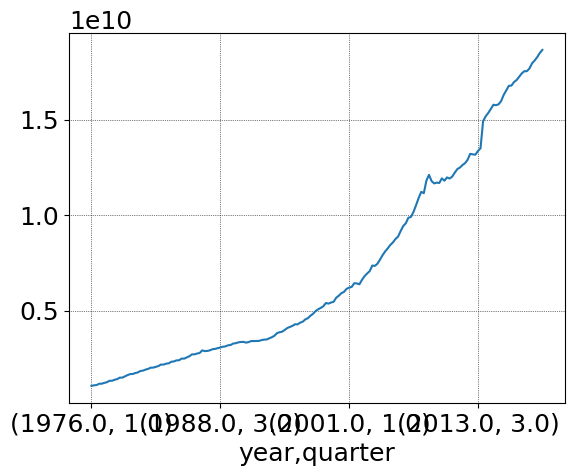

In [273]:
df_agg.assets.plot(grid=True)


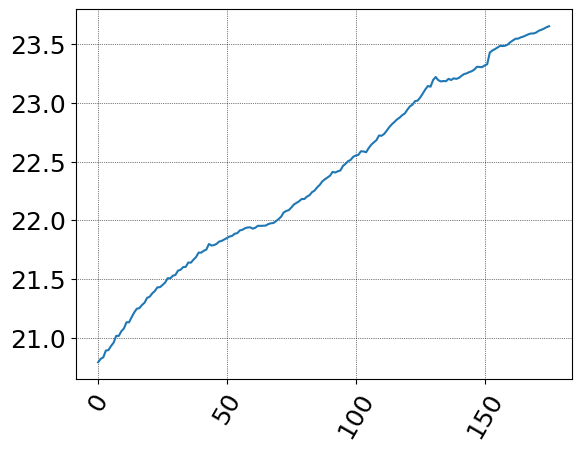

In [274]:
np.log(df_agg1.assets).plot(grid=True, rot=60)

In [275]:
df_agg1[df_agg1.year==2013]

,year,quarter,rssdid,bhcid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets
148,2013.0,1.0,6.466822e+09,9.957780e+09,1.319233e+10,1.387868e+09,445119695.0,2.714481e+09,6.767474e+09,717317350.0
149,2013.0,2.0,6.368224e+09,9.886000e+09,1.317578e+10,1.416118e+09,426842665.0,2.658847e+09,6.835070e+09,652111720.0
150,2013.0,3.0,6.313098e+09,9.832671e+09,1.336706e+10,1.597992e+09,426121135.0,2.662613e+09,6.908212e+09,608093221.0
151,2013.0,4.0,6.226239e+09,9.767610e+09,1.350882e+10,1.600496e+09,424085949.0,2.706214e+09,7.011800e+09,607053046.0


In [281]:
df_agg[df_agg.year==2014]

,year,quarter,rssdid,bhcid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,Financial Institution Filing Type
152,2014.0,1.0,7.089227e+09,0.0,1.492040e+10,1.820088e+09,0.0,0.0,5.114046e+09,598120369.0,277654.0
153,2014.0,2.0,6.986977e+09,0.0,1.518294e+10,1.848312e+09,0.0,0.0,5.190100e+09,603782131.0,274702.0
154,2014.0,3.0,6.892097e+09,0.0,1.535912e+10,1.906680e+09,0.0,0.0,5.227848e+09,640674548.0,271791.0
155,2014.0,4.0,6.792672e+09,0.0,1.556402e+10,1.926304e+09,0.0,0.0,5.299671e+09,655648226.0,268480.0


In [277]:
df_agg1[df_agg1.year==2015]

,year,quarter,rssdid,bhcid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets
156,2015.0,1.0,6.670220e+09,0.0,1.578823e+10,2.009109e+09,0.0,0.0,5.264577e+09,661604655.0
157,2015.0,2.0,6.550640e+09,0.0,1.576484e+10,1.851826e+09,0.0,0.0,5.374884e+09,591224657.0
158,2015.0,3.0,6.444604e+09,0.0,1.581047e+10,1.794658e+09,0.0,0.0,5.467481e+09,576040183.0
159,2015.0,4.0,6.318860e+09,0.0,1.597779e+10,1.761959e+09,0.0,0.0,5.636914e+09,541654777.0
